In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Forest_Cover_participants_Data/train.csv')
test = pd.read_csv('Forest_Cover_participants_Data/test.csv')
sub = pd.read_csv('Forest_Cover_participants_Data/sample_submission.csv')

In [3]:
train.tail(5)

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
29045,2701,149,1,0,0,2207,221,238,154,607,...,0,0,0,0,0,0,0,0,0,5
29046,2929,129,10,150,36,351,237,234,127,297,...,1,0,0,0,0,0,0,0,0,5
29047,3034,294,17,212,46,2671,172,234,202,1717,...,1,0,0,0,0,0,0,0,0,7
29048,2730,122,9,360,106,1560,236,233,128,514,...,0,0,0,0,0,0,0,0,0,5
29049,3146,247,11,339,38,994,198,248,189,1237,...,0,0,0,0,0,0,0,0,0,5


In [4]:
test.head(5)

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2798,151,12,60,-5,3373,236,240,132,6083,...,0,0,0,0,0,0,0,0,0,0
1,3582,96,34,420,80,2579,250,170,19,3771,...,0,0,0,0,0,0,0,0,0,1
2,2619,171,12,270,-52,2764,228,245,147,2008,...,0,0,0,0,0,0,0,0,0,0
3,2897,155,5,210,14,2437,226,240,149,2455,...,0,0,0,0,0,0,0,0,0,0
4,2845,32,12,309,47,2778,217,213,129,42,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Elevation(meters)                             0
 Aspect(degrees)                               0
 Slope(degrees)                                0
 Horizontal_Distance_To_Hydrology(meters)      0
 Vertical_Distance_To_Hydrology(meters)        0
 Horizontal_Distance_To_Roadways(meters)       0
 Hillshade_9am                                 0
 Hillshade_Noon                                0
 Hillshade_3pm                                 0
 Horizontal_Distance_To_Fire_Points(meters)    0
 Wilderness_Area_1                             0
 Wilderness_Area_2                             0
 Wilderness_Area_3                             0
 Wilderness_Area_4                             0
 Soil_Type_1                                   0
 Soil_Type_2                                   0
 Soil_Type_3                                   0
 Soil_Type_4                                   0
 Soil_Type_5                                   0
 Soil_Type_6                                   0
 Soil_Type_7        

In [6]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

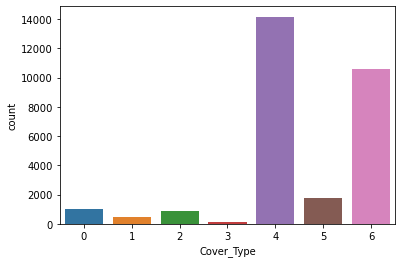

In [7]:
train['Cover_Type']=train['Cover_Type']-1
import seaborn as sns
sns.countplot(train['Cover_Type'])


In [8]:
train_df=train
test_df=test

In [9]:
X = train_df.drop(labels=['Cover_Type'], axis=1)
y = train_df['Cover_Type'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [11]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((24692, 54), (24692,), (4358, 54), (4358,))

In [12]:
from sklearn.metrics import log_loss

In [13]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'multiclass',
         'num_class': 7,
         'boosting': 'gbdt',  
         'metric': 'multi_logloss',
         'learning_rate': 0.1, 
         'num_iterations': 2000,
         'num_leaves': 100,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction':0.9,
         'bagging_freq': 1,
         'feature_fraction': 0.7,
         'lambda_l2': 0.8,
         'min_data_per_group': 75,
         'max_bin': 255,
         'is_unbalance':True
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=200,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_cv)

C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.37384
[200]	valid_0's multi_logloss: 0.346236
[300]	valid_0's multi_logloss: 0.338411
[400]	valid_0's multi_logloss: 0.336119
[500]	valid_0's multi_logloss: 0.337209
[600]	valid_0's multi_logloss: 0.341134
Early stopping, best iteration is:
[452]	valid_0's multi_logloss: 0.336052


In [14]:
log_loss(y_cv, y_pred)

0.3360517917131361

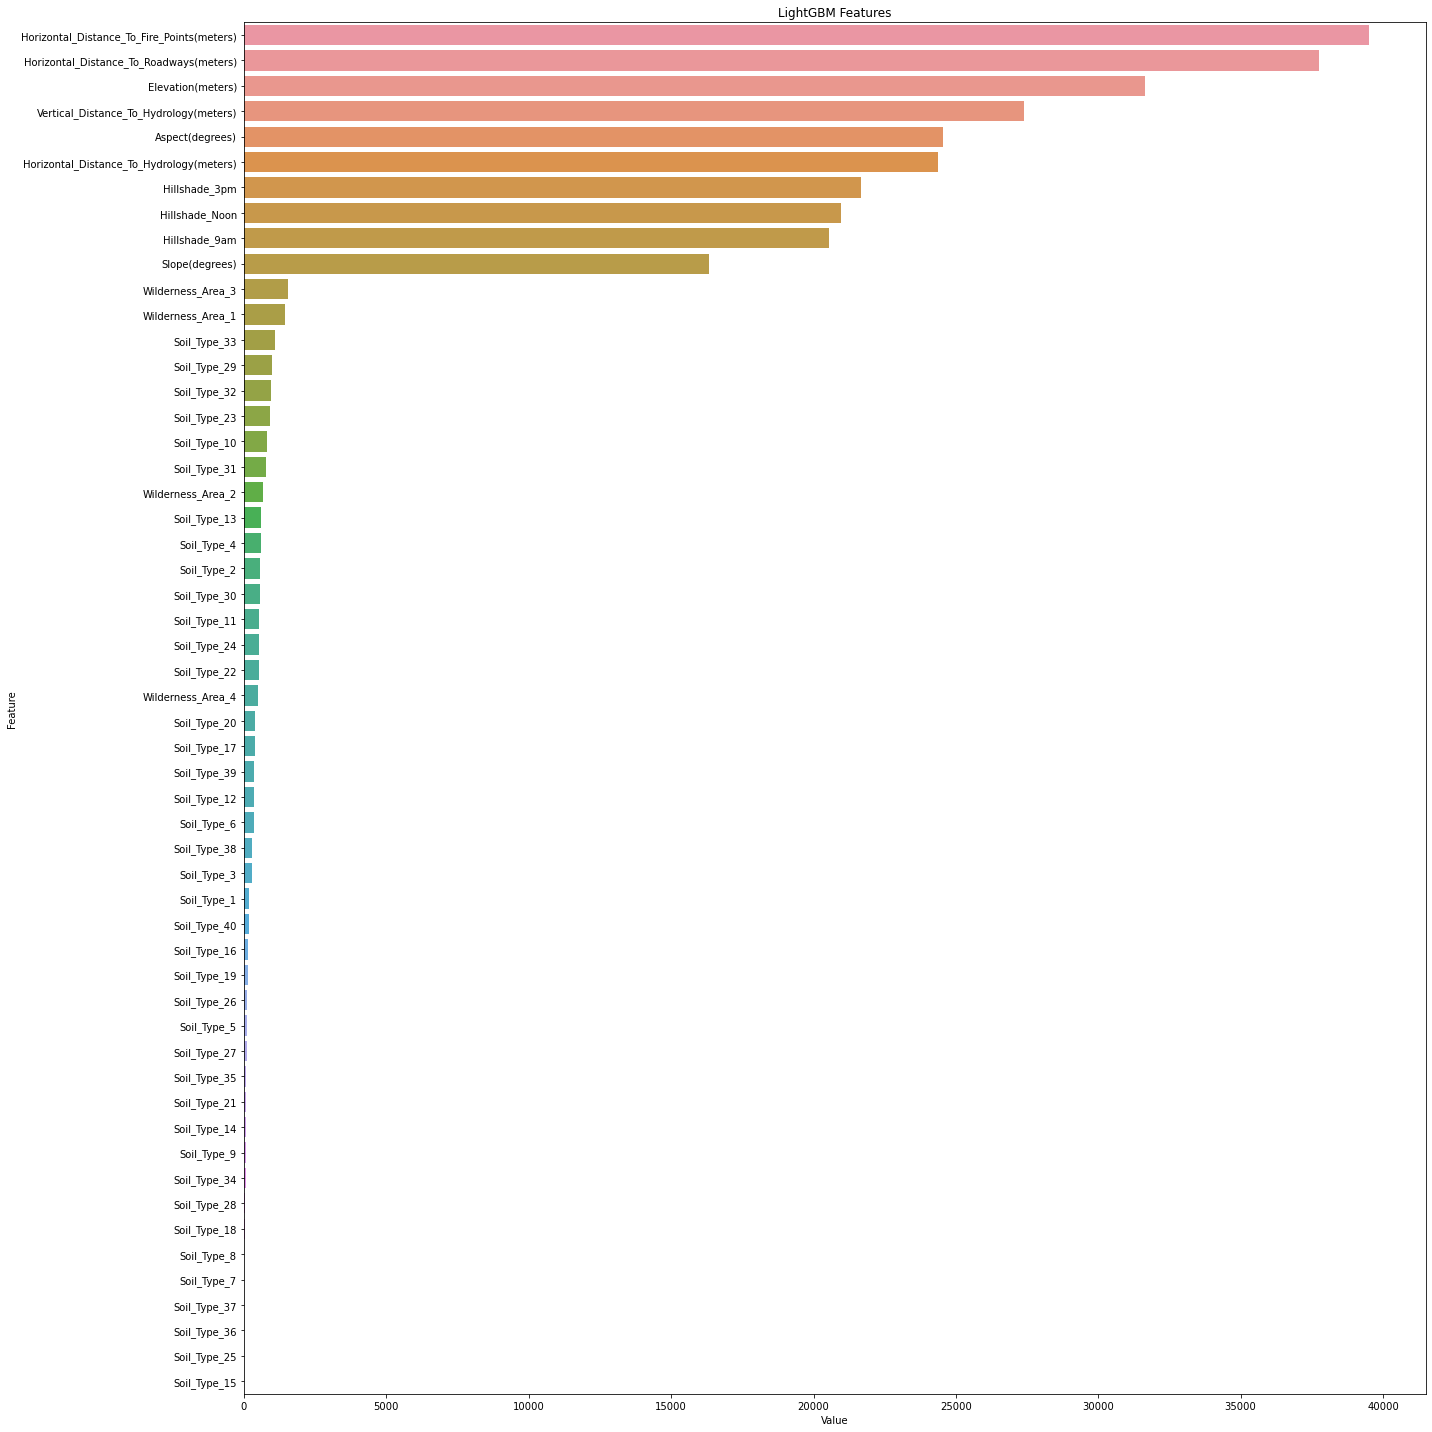

In [15]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(), X.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [16]:
feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False)

,Value,Feature
0,39518,Horizontal_Distance_To_Fire_Points(meters)
1,37756,Horizontal_Distance_To_Roadways(meters)
2,31627,Elevation(meters)
3,27401,Vertical_Distance_To_Hydrology(meters)
4,24546,Aspect(degrees)
5,24374,Horizontal_Distance_To_Hydrology(meters)
6,21653,Hillshade_3pm
7,20974,Hillshade_Noon
8,20548,Hillshade_9am
9,16330,Slope(degrees)


In [17]:
Xtest = test_df

In [18]:
from sklearn.model_selection import KFold, StratifiedKFold

errlgb = []
y_pred_totlgb = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123456789)

for train_index, test_index in fold.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    
    clf = lgb.train(params=param, 
                     early_stopping_rounds=200,
                     verbose_eval=100,
                     train_set=train_data,
                     valid_sets=[test_data])

    y_pred = clf.predict(X_test)
    print("Log Loss: ", (log_loss(y_test, y_pred)))
    
    errlgb.append(log_loss(y_test, y_pred))
    p = clf.predict(Xtest)
    y_pred_totlgb.append(p)

C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.393754
[200]	valid_0's multi_logloss: 0.366569
[300]	valid_0's multi_logloss: 0.361731
[400]	valid_0's multi_logloss: 0.36365
[500]	valid_0's multi_logloss: 0.367456
Early stopping, best iteration is:
[340]	valid_0's multi_logloss: 0.361544
Log Loss:  0.36154446609531976


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.387943
[200]	valid_0's multi_logloss: 0.358211
[300]	valid_0's multi_logloss: 0.349609
[400]	valid_0's multi_logloss: 0.34755
[500]	valid_0's multi_logloss: 0.350129
Early stopping, best iteration is:
[358]	valid_0's multi_logloss: 0.347362
Log Loss:  0.3473624365159055


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.373009
[200]	valid_0's multi_logloss: 0.341566
[300]	valid_0's multi_logloss: 0.331856
[400]	valid_0's multi_logloss: 0.329404
[500]	valid_0's multi_logloss: 0.330643
Early stopping, best iteration is:
[397]	valid_0's multi_logloss: 0.329081
Log Loss:  0.32908082764661045


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.386736
[200]	valid_0's multi_logloss: 0.356043
[300]	valid_0's multi_logloss: 0.347692
[400]	valid_0's multi_logloss: 0.345172
[500]	valid_0's multi_logloss: 0.346058
Early stopping, best iteration is:
[392]	valid_0's multi_logloss: 0.344777
Log Loss:  0.3447770808742542


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.373115
[200]	valid_0's multi_logloss: 0.337242
[300]	valid_0's multi_logloss: 0.328175
[400]	valid_0's multi_logloss: 0.324778
[500]	valid_0's multi_logloss: 0.324795
Early stopping, best iteration is:
[398]	valid_0's multi_logloss: 0.324452
Log Loss:  0.32445187777140555


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.384803
[200]	valid_0's multi_logloss: 0.361194
[300]	valid_0's multi_logloss: 0.357223
[400]	valid_0's multi_logloss: 0.357232
[500]	valid_0's multi_logloss: 0.362616
Early stopping, best iteration is:
[359]	valid_0's multi_logloss: 0.355311
Log Loss:  0.3553106030787821


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.39963
[200]	valid_0's multi_logloss: 0.377225
[300]	valid_0's multi_logloss: 0.373657
[400]	valid_0's multi_logloss: 0.376857
Early stopping, best iteration is:
[291]	valid_0's multi_logloss: 0.373191
Log Loss:  0.3731909637937037


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.382069
[200]	valid_0's multi_logloss: 0.355352
[300]	valid_0's multi_logloss: 0.347445
[400]	valid_0's multi_logloss: 0.348353
[500]	valid_0's multi_logloss: 0.351296
Early stopping, best iteration is:
[331]	valid_0's multi_logloss: 0.347365
Log Loss:  0.34736514805934593


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.375326
[200]	valid_0's multi_logloss: 0.34497
[300]	valid_0's multi_logloss: 0.338837
[400]	valid_0's multi_logloss: 0.339877
[500]	valid_0's multi_logloss: 0.341602
Early stopping, best iteration is:
[381]	valid_0's multi_logloss: 0.33795
Log Loss:  0.3379502917964781


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.412121
[200]	valid_0's multi_logloss: 0.389476
[300]	valid_0's multi_logloss: 0.383587
[400]	valid_0's multi_logloss: 0.388234
Early stopping, best iteration is:
[298]	valid_0's multi_logloss: 0.383434
Log Loss:  0.3834339569145257


In [19]:
np.mean(errlgb,0)

0.35044676525463314

In [20]:
sub.columns

Index(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0'], dtype='object')

In [21]:
y_pred = np.mean(y_pred_totlgb,0)

In [22]:
submission = pd.DataFrame(data=y_pred, columns=sub.columns)
submission.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,0.000002,3.249471e-05,1.525105e-06,5.096372e-07,0.992953,7.625112e-06,0.007003
1,0.988705,3.368577e-07,8.655129e-08,9.593969e-08,0.000033,1.969713e-07,0.011262
2,0.000010,2.367116e-04,1.163483e-04,1.476167e-06,0.995782,1.090957e-03,0.002763
3,0.000017,7.364412e-04,2.980739e-06,1.647655e-06,0.980950,3.143650e-05,0.018261
4,0.000012,6.400635e-05,6.338566e-05,3.326952e-06,0.240090,6.730325e-05,0.759701


In [23]:
submission.to_csv('lgb1.csv',index=False)

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_cv)

log_loss(y_cv, y_pred)

0.5653358466842884

In [25]:
Xtest = test_df

In [26]:
err = []
y_pred_tot = []

fold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict_proba(X_test)
    
    print("Log Loss:", log_loss(y_test, y_pred))

    err.append(log_loss(y_test, y_pred))
    p = xgb.predict_proba(Xtest)
    y_pred_tot.append(p)

Log Loss: 0.5895552602867784
Log Loss: 0.6106554003465476
Log Loss: 0.5936660728098433
Log Loss: 0.6073081570395485
Log Loss: 0.6028971433450222
Log Loss: 0.6035230365924058


In [27]:
np.mean(err, 0)

0.6012675117366909

In [28]:
np.mean(y_pred_tot, 0)

array([[5.9621740e-04, 5.2068071e-03, 1.1139886e-03, ..., 8.7281102e-01,
        1.7026818e-03, 1.1812190e-01],
       [4.2670384e-01, 5.4600020e-04, 6.3463277e-04, ..., 1.9831076e-02,
        4.9506564e-04, 5.5131912e-01],
       [6.2699255e-04, 2.6836595e-02, 3.9252583e-02, ..., 6.2206703e-01,
        2.5145423e-01, 5.9292983e-02],
       ...,
       [9.4200188e-04, 6.5769330e-02, 1.0193513e-03, ..., 6.9403595e-01,
        1.2682244e-03, 2.3625897e-01],
       [7.6182728e-04, 8.3385175e-04, 6.8411714e-04, ..., 5.5181664e-01,
        1.0011859e-03, 4.4433117e-01],
       [9.7465917e-04, 3.6605828e-02, 2.3265099e-03, ..., 7.9715890e-01,
        4.6017002e-03, 1.5758435e-01]], dtype=float32)

In [29]:
y_pred = np.mean(y_pred_tot, 0)

In [30]:
sub = pd.DataFrame(y_pred)
sub.head(5)

,0,1,2,3,4,5,6
0,0.000596,0.005207,0.001114,0.000447,0.872811,0.001703,0.118122
1,0.426704,0.000546,0.000635,0.000470,0.019831,0.000495,0.551319
2,0.000627,0.026837,0.039253,0.000470,0.622067,0.251454,0.059293
3,0.000962,0.036202,0.001182,0.000721,0.807239,0.001442,0.152252
4,0.001067,0.029276,0.001736,0.000799,0.764950,0.007822,0.194351


In [31]:
sub.to_csv('xgboost1.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y)

In [33]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'multiclass',
         'num_class': 7,
         'boosting': 'gbdt',  
         'metric': 'multi_logloss',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 100,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction':0.9,
         'bagging_freq': 1,
         'feature_fraction': 0.7,
         'lambda_l2': 0.8,
         'min_data_per_group': 75,
         'max_bin': 255,
         'is_unbalance':False
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=200,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_cv)

C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.383612
[200]	valid_0's multi_logloss: 0.352889
[300]	valid_0's multi_logloss: 0.344877
[400]	valid_0's multi_logloss: 0.343167
[500]	valid_0's multi_logloss: 0.34436
[600]	valid_0's multi_logloss: 0.347473
Early stopping, best iteration is:
[434]	valid_0's multi_logloss: 0.342898


In [34]:
Xtest = test_df

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold

errlgb = []
y_pred_totlgb = []

fold = StratifiedKFold(n_splits=10, shuffle=False, random_state=123456789)

for train_index, test_index in fold.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    param = {'objective': 'multiclass',
         'num_class': 7,
         'boosting': 'gbdt',  
         'metric': 'multi_logloss',
         'learning_rate': 0.2, 
         'num_iterations': 2000,
         'num_leaves': 100,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction':0.9,
         'bagging_freq': 1,
         'feature_fraction': 0.7,
         'lambda_l2': 0.8,
         'min_data_per_group': 75,
         'max_bin': 255,
         'is_unbalance':False
         }
    clf = lgb.train(params=param,
                     early_stopping_rounds=200,
                     verbose_eval=100,
                     train_set=train_data,
                     valid_sets=[test_data])

    y_pred = clf.predict(X_test)
    print("Log Loss: ", (log_loss(y_test, y_pred)))
    
    errlgb.append(log_loss(y_test, y_pred))
    p = clf.predict(Xtest)
    y_pred_totlgb.append(p)

C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.365772
[200]	valid_0's multi_logloss: 0.3585
[300]	valid_0's multi_logloss: 0.363668
Early stopping, best iteration is:
[195]	valid_0's multi_logloss: 0.357428
Log Loss:  0.3574282011407435


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.360115
[200]	valid_0's multi_logloss: 0.354914
[300]	valid_0's multi_logloss: 0.362189
Early stopping, best iteration is:
[179]	valid_0's multi_logloss: 0.352889
Log Loss:  0.3528892707199674


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.373311
[200]	valid_0's multi_logloss: 0.363238
[300]	valid_0's multi_logloss: 0.367907
Early stopping, best iteration is:
[197]	valid_0's multi_logloss: 0.362766
Log Loss:  0.3627657285257436


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.370313
[200]	valid_0's multi_logloss: 0.367705
[300]	valid_0's multi_logloss: 0.377788
Early stopping, best iteration is:
[132]	valid_0's multi_logloss: 0.365147
Log Loss:  0.3651473620260105


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.350523
[200]	valid_0's multi_logloss: 0.343231
[300]	valid_0's multi_logloss: 0.345516
Early stopping, best iteration is:
[191]	valid_0's multi_logloss: 0.342277
Log Loss:  0.34227685527239343


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.383749
[200]	valid_0's multi_logloss: 0.382761
[300]	valid_0's multi_logloss: 0.395919
Early stopping, best iteration is:
[131]	valid_0's multi_logloss: 0.381361
Log Loss:  0.38136148627999705


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.366714
[200]	valid_0's multi_logloss: 0.360087
[300]	valid_0's multi_logloss: 0.368763
Early stopping, best iteration is:
[195]	valid_0's multi_logloss: 0.359043
Log Loss:  0.35904257986633265


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.364761
[200]	valid_0's multi_logloss: 0.357068
[300]	valid_0's multi_logloss: 0.365306
Early stopping, best iteration is:
[183]	valid_0's multi_logloss: 0.356413
Log Loss:  0.35641319694191875


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.361099
[200]	valid_0's multi_logloss: 0.359354
[300]	valid_0's multi_logloss: 0.366485
Early stopping, best iteration is:
[136]	valid_0's multi_logloss: 0.35648
Log Loss:  0.35648031842712175


C:\Users\kesha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.346975
[200]	valid_0's multi_logloss: 0.343094
[300]	valid_0's multi_logloss: 0.349827
Early stopping, best iteration is:
[144]	valid_0's multi_logloss: 0.340249
Log Loss:  0.34024920648930973


In [36]:
np.mean(errlgb,0)

0.35740542056895386

In [37]:

sub.columns

RangeIndex(start=0, stop=7, step=1)

In [38]:
y_pred = np.mean(y_pred_totlgb,0)

In [39]:

submission = pd.DataFrame(data=y_pred, columns=sub.columns)
submission.head()

,0,1,2,3,4,5,6
0,0.000002,2.723828e-05,1.830440e-06,4.596642e-07,0.994611,8.637008e-06,0.005349
1,0.986627,5.206973e-07,1.578939e-07,1.232250e-07,0.000050,2.788258e-07,0.013323
2,0.000010,3.521545e-04,1.220398e-04,1.776643e-06,0.994563,2.361017e-03,0.002590
3,0.000018,1.975362e-03,3.079204e-06,1.573488e-06,0.978267,4.396957e-05,0.019691
4,0.000021,1.074313e-04,7.266962e-05,3.657834e-06,0.270100,1.080632e-04,0.729588


In [40]:

submission.to_csv('lgb2.csv', index=False)